In [1]:
# Load libraries
import csv
import matplotlib.pyplot as plt
import statistics
import numpy as np
import os

In [10]:
# Set filepath

repository='/home/ebb505/ARE_Project/are-logs/PPSN/BL/'
experimentName = "RS"

# repository='/home/ebb505/ARE_Project/are-logs/PPSN/NS/'
# experimentName = "NS"

# repository='/home/ebb505/ARE_Project/are-logs/PPSN/GRi/'
# experimentName = "GRi"


filename='tests.csv'

In [3]:
# Get all directories
folders = []
# r=root, d=directories, f = files
for r, d, f in os.walk(repository):
    for folder in d:
        folders.append(os.path.join(r, folder))
print("Folders found: ", len(folders))

Folders found:  18


In [4]:
# Get information from files
my_replicates = []
for f in folders:
    my_list = []
    with open(f + '/' + filename, 'r') as csvfile:
        data = csv.reader(csvfile, delimiter=',', quotechar='"')
        for row in data:
            my_list.append(row[:-1]) # Last character is empty for some reason
    my_replicates.append(my_list)

In [5]:
population = 40
#replicates = len(my_replicates)
replicates = 15
#evaluations = len(my_replicates[0])
evaluations = 20000
features = len(my_replicates[0][0])
generations = int(evaluations / population)
print("Replicates: ", replicates, "Evaluations: ", evaluations, "Features: ", features, "Generations: ", generations)

Replicates:  15 Evaluations:  20000 Features:  6 Generations:  500


In [6]:
# 
sumRepSkeleton = []
sumRepHeadConneted = []
sumRepNoCollisions = []
sumRepNoBadOrientations = []
sumRepGripperAccess = []
for i in range(replicates):
    dat = np.array([[float(y) for y in x] for x in my_replicates[i]]) # Convert to array
    sumSkeleton = []
    sumHeadConneted = []
    sumNoCollisions = []
    sumNoBadOrientations = []
    sumGripperAccess = []
    for j in range(population,evaluations,population):
        sumSkeleton.append(sum(dat[:j,1] > 0)/j)
        sumNoCollisions.append(sum(dat[:j,2] > 0)/j)
        sumNoBadOrientations.append(sum(dat[:j,3] > 0)/j)
        sumHeadConneted.append(sum(dat[:j,4] > 0)/j)
        sumGripperAccess.append(sum(dat[:j,5] > 0)/j)
    sumRepSkeleton.append(sumSkeleton)
    sumRepHeadConneted.append(sumHeadConneted)
    sumRepNoCollisions.append(sumNoCollisions)
    sumRepNoBadOrientations.append(sumNoBadOrientations)
    sumRepGripperAccess.append(sumGripperAccess)
    print(i)
print("Done!")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Done!


In [7]:
interval=50
rangeValues = range(0,generations,interval)
lenRange = len(rangeValues)

skeletonArray = np.array(sumRepSkeleton)
headArray = np.array(sumRepHeadConneted)
collisionsArray = np.array(sumRepNoCollisions)
noBadOrientationsArray = np.array(sumRepNoBadOrientations)
gripperArray = np.array(sumRepGripperAccess)

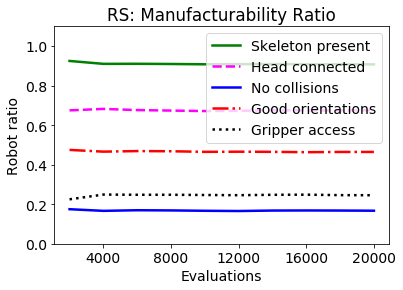

In [11]:
font = {'weight' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

plt.figure(0)

# Plot medians and stuff
xValues = list(rangeValues)
xValues = [x/interval +1 for x in xValues] # Becareful with this offset
axes = plt.gca()
axes.set_ylim([0,1.1])

axes = plt.gca()

skeletonMedians = []
headMedians = []
collisionsMedians = []
noBadOrientationsMedians = []
gripperMedians = []

for i in rangeValues:
    skeletonMedians.append(statistics.median(skeletonArray[:,i]))
    headMedians.append(statistics.median(headArray[:,i]))
    collisionsMedians.append(statistics.median(collisionsArray[:,i]))
    noBadOrientationsMedians.append(statistics.median(noBadOrientationsArray[:,i]))
    gripperMedians.append(statistics.median(gripperArray[:,i]))
    
plt.plot(xValues, skeletonMedians, '-', color='green', linewidth=2.5)
plt.plot(xValues, headMedians, '--', color='magenta', linewidth=2.5)
plt.plot(xValues, collisionsMedians, '-', color='blue', linewidth=2.5)
plt.plot(xValues, noBadOrientationsMedians, '-.', color='red', linewidth=2.5)
plt.plot(xValues, gripperMedians, ':', color='black', linewidth=2.5)


# Plot box plot stuff
# plt.boxplot(skeletonArray[:,rangeValues])
# plt.boxplot(headArray[:,rangeValues])
# plt.boxplot(collisionsArray[:,rangeValues])
#plt.boxplot(noBadOrientationsArray[:,rangeValues], notch=True)
# plt.boxplot(gripperArray[:,rangeValues])


# Labels and stuff
plt.xlabel('Evaluations')
plt.ylabel('Robot ratio')
plt.legend(['Skeleton present', 'Head connected', 'No collisions','Good orientations','Gripper access' ])
#plt.legend(['Skeleton present', 'Head connected', 'No collisions','Gripper access' ])
plt.title(experimentName + ": Manufacturability Ratio")
#rangeX = range(50,generations+50,50) # Why are these offsets necessary?

rangeX = range(100*40,evaluations+50*40,100*40) # Why are these offsets necessary?
posX = range(int(lenRange/10)*2,lenRange+2,int(lenRange/10)*2) # Why are these offsets necessary?

plt.xticks(posX,rangeX)
plt.savefig(repository+experimentName+'ManRatPop.png', dpi=200)

In [33]:
print("Figure generated!")

10
